## Imports

In [76]:
import pandas as pd             
import numpy as np               
import matplotlib.pyplot as plt 
import seaborn as sns         
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter

In [3]:
listings = pd.read_csv('../data/listings-3.csv')

In [4]:
listings.head()

id                                      listing_url  \
0  827736378366911479  https://www.airbnb.com/rooms/827736378366911479   
1  592589963829194972  https://www.airbnb.com/rooms/592589963829194972   
2  772438920837360569  https://www.airbnb.com/rooms/772438920837360569   
3            33271346            https://www.airbnb.com/rooms/33271346   
4              484515              https://www.airbnb.com/rooms/484515   

        scrape_id last_scraped       source  \
0  20230327145536   2023-03-27  city scrape   
1  20230327145536   2023-03-28  city scrape   
2  20230327145536   2023-03-27  city scrape   
3  20230327145536   2023-03-28  city scrape   
4  20230327145536   2023-03-28  city scrape   

                                            name  \
0                                 Legion 1BR/1BA   
1                       Club Wyndham Royal Vista   
2  Relaxing 5 Acre Ranch home with private pond!   
3       Beach Escape – One Block from the Beach!   
4            MIAMI- AMAZING APARTMENT OVER BEACH   

                                         description  \
0  Take it easy at this unique and tranquil getaway.   
1  Located directly on the beach, the property si...   
2  Relax with the whole family at this peaceful p...   
3  Newly constructed and beautifully renovated Ke...   
4  <b>The space</b><br />The apartment is located...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Pompano world-famous coastline is a very popul...   
4                                                NaN   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  475630606  ...   
1  https://a0.muscache.com/pictures/8a429c15-ea50...   66506549  ...   
2  https://a0.muscache.com/pictures/miso/Hosting-...  382318476  ...   
3  https://a0.muscache.com/pictures/0f2305d2-7400...  118856968  ...   
4  https://a0.muscache.com/pictures/6791581/6de56...     637272  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                         NaN                    NaN                 NaN   
2                         5.0                   5.00                5.00   
3                         4.8                   4.88                4.68   
4                         4.6                   4.64                4.44   

  license instant_bookable calculated_host_listings_count  \
0     NaN                t                              1   
1     NaN                f                              5   
2     NaN                f                              1   
3     NaN                t                              3   
4     NaN                f                              6   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           0   
2                                           1   
3                                           3   
4                                           6   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            5   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               NaN  
1                                           0               NaN  
2                                           0              0.65  
3                                           0              2.69  
4                                           0              0.21  

[5 rows x 75 columns]

In [5]:
listings.shape

(16899, 75)

In [6]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16899 entries, 0 to 16898
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16899 non-null  int64  
 1   listing_url                                   16899 non-null  object 
 2   scrape_id                                     16899 non-null  int64  
 3   last_scraped                                  16899 non-null  object 
 4   source                                        16899 non-null  object 
 5   name                                          16898 non-null  object 
 6   description                                   16673 non-null  object 
 7   neighborhood_overview                         10460 non-null  object 
 8   picture_url                                   16899 non-null  object 
 9   host_id                                       16899 non-null 

In [20]:
# Separate numeric and categorical columns
numeric_columns = listings_cleaned_columns_filled.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = listings_cleaned_columns_filled.select_dtypes(include=['object']).columns

# Display the numeric columns
print("Numeric Columns:")
print(numeric_columns)

# Display the categorical columns
print("\nCategorical Columns:")
print(categorical_columns)


Numeric Columns:
Index(['id', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'reviews_per_month'],
      dtype='object')

Categorical Columns:
Index(['last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_name', 'host_location', 'neighbourhood', 'property_type',
       'room_type', 'bathrooms_text', 'amenities', 'last_review'],
      dtype='object')


In [8]:
# Remove non-numeric characters and convert 'price' column to float
listings['price'] = listings['price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Convert 'price' column to 'int64'
listings['price'] = listings['price'].astype('int64')

In [9]:
listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2837
Length: 75, dtype: int64

In [10]:
# Fill 'reviews_per_month' column with '0'
listings['reviews_per_month'].fillna(0, inplace=True)

In [11]:
# List of irrelevant columns
irrelevant_columns = ['listing_url', 'scrape_id','bathrooms','neighbourhood_group_cleansed','source', 'picture_url', 'host_id', 'host_url', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

# Remove irrelevant columns from listings DataFrame
listings_cleaned_columns = listings.drop(columns=irrelevant_columns)


In [12]:
listings_cleaned_columns.isna().sum()

id                           0
last_scraped                 0
name                         1
description                226
neighborhood_overview     6439
host_name                    1
host_location             4773
neighbourhood             6439
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text              17
bedrooms                  1332
beds                       197
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
minimum_minimum_nights       0
maximum_minimum_nights       0
minimum_maximum_nights       0
maximum_maximum_nights       0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
last_review               2837
review_scores_rating      2837
reviews_per_month            0
dtype: int64

In [13]:
# Drop 'NaN' values
listings_cleaned_columns_dropped = listings_cleaned_columns.dropna(subset=['bathrooms_text', 'bedrooms', 'beds','last_review'], inplace =True)


In [14]:
# Fill 'NaN' values
listings_cleaned_columns_filled = listings_cleaned_columns.fillna({
    'name': 'Unnamed', 
    'description': 'No description available',
    'neighborhood_overview': 'No description available', 
    'host_name': 'Unnamed',
    'host_location': 'No location',
    'neighbourhood': 'None',
})

In [15]:
listings_cleaned_columns_filled.isna().sum()

id                        0
last_scraped              0
name                      0
description               0
neighborhood_overview     0
host_name                 0
host_location             0
neighbourhood             0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
minimum_minimum_nights    0
maximum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
maximum_nights_avg_ntm    0
last_review               0
review_scores_rating      0
reviews_per_month         0
dtype: int64

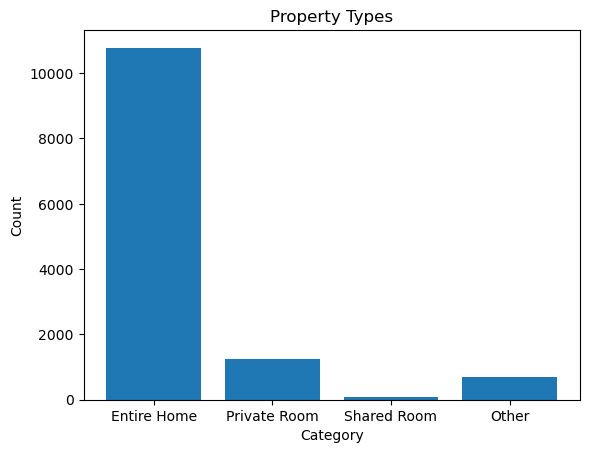

In [16]:
property_categories = {
    'Entire Home': ['Entire home', 'Entire rental unit', 'Entire condo', 'Entire villa', 'Entire serviced apartment', 'Entire vacation home', 'Entire townhouse', 'Entire cottage', 'Entire guesthouse', 'Entire bungalow', 'Entire loft', 'Entire resort', 'Entire timeshare', 'Entire cabin', 'Entire chalet', 'Entire place'],
    'Private Room': ['Private room in home', 'Private room in condo', 'Private room in townhouse', 'Private room in guesthouse', 'Private room in bed and breakfast', 'Private room in rental unit', 'Private room in villa', 'Private room in casa particular', 'Private room in vacation home', 'Private room in tent', 'Private room in minsu', 'Private room in serviced apartment', 'Private room in cottage', 'Private room in farm stay', 'Private room in boat', 'Private room in loft', 'Private room in tiny home', 'Private room in camper/rv', 'Private room in tower', 'Private room in earthen home'],
    'Shared Room': ['Shared room in home', 'Shared room in guest suite', 'Shared room in hostel', 'Shared room in condo', 'Shared room in guesthouse', 'Shared room in casa particular', 'Shared room in aparthotel', 'Shared room in rental unit', 'Shared room in boutique hotel', 'Shared room in townhouse'],
    'Other': ['Private room', 'Room in hotel', 'Room in aparthotel', 'Room in boutique hotel', 'Camper/RV', 'Lighthouse', 'Boat', 'Houseboat', 'Campsite', 'Barn', 'Island', 'Treehouse', 'Farm stay', 'Casa particular', 'Shipping container', 'Castle', 'Room in resort', 'Tent']
}

#  dictionary to store the count of each property category
property_category_counts = {
    'Entire Home': 0,
    'Private Room': 0,
    'Shared Room': 0,
    'Other': 0
}

# occurrences of each property category
for property_type in listings_cleaned_columns_filled['property_type']:
    if property_type in property_categories['Entire Home']:
        property_category_counts['Entire Home'] += 1
    elif property_type in property_categories['Private Room']:
        property_category_counts['Private Room'] += 1
    elif property_type in property_categories['Shared Room']:
        property_category_counts['Shared Room'] += 1
    else:
        property_category_counts['Other'] += 1

# Convert the counts dictionary into separate lists for labels and counts
labels = list(property_category_counts.keys())
counts = list(property_category_counts.values())

# Create a bar plot
plt.bar(labels, counts)

# Set the plot title and axis labels
plt.title('Property Types')
plt.xlabel('Category')
plt.ylabel('Count')

# Display the plot
plt.show()


In [22]:
# Categorical columns
categorical_columns = ['last_scraped', 'name', 'description', 'neighborhood_overview',
                       'host_name', 'host_location', 'neighbourhood', 'property_type',
                       'room_type', 'bathrooms_text', 'amenities', 'last_review']


# Numerical columns
numeric_columns = ['id', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds',
                   'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                   'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm', 'reviews_per_month']



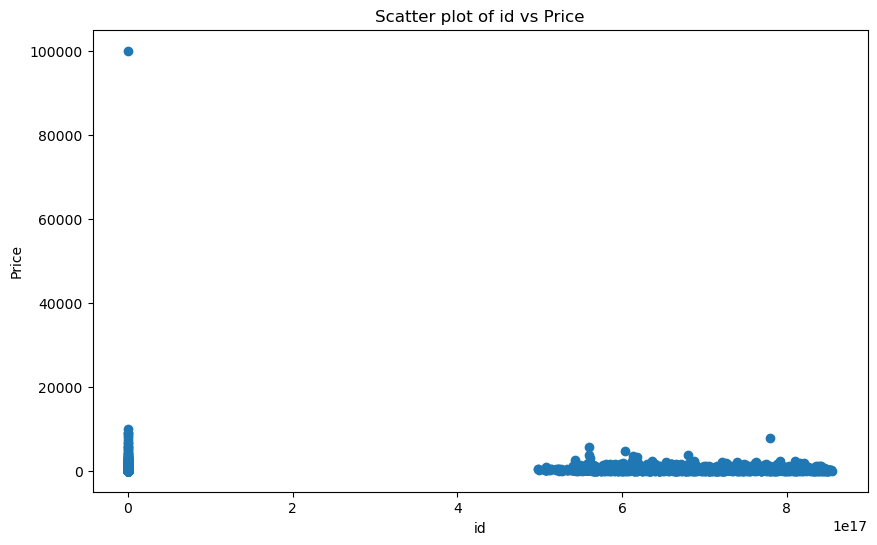

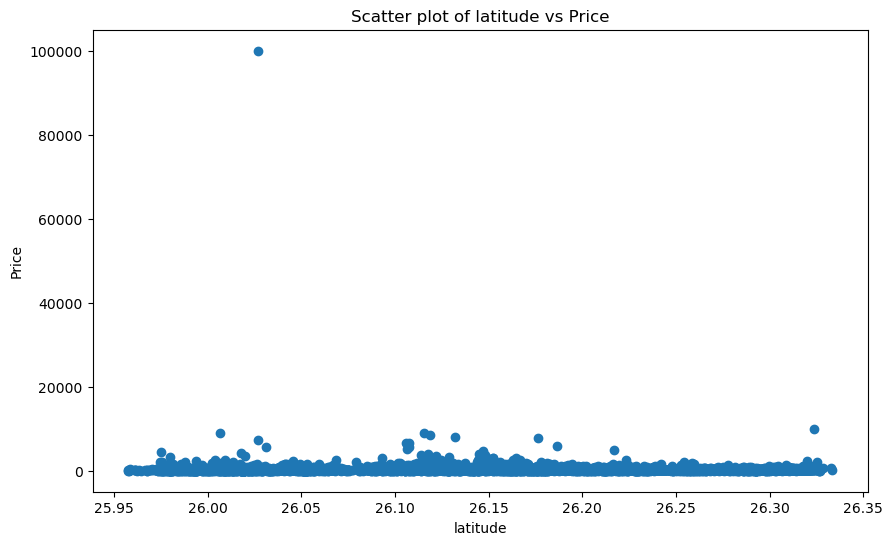

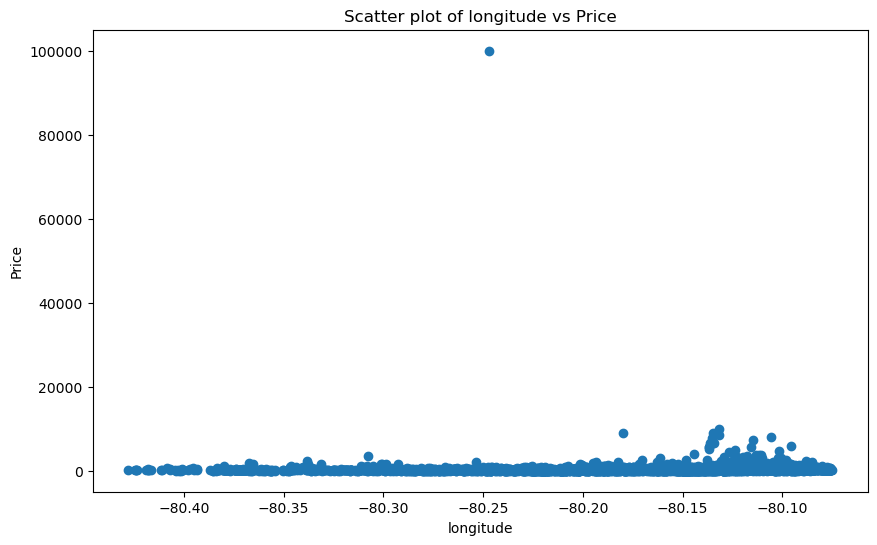

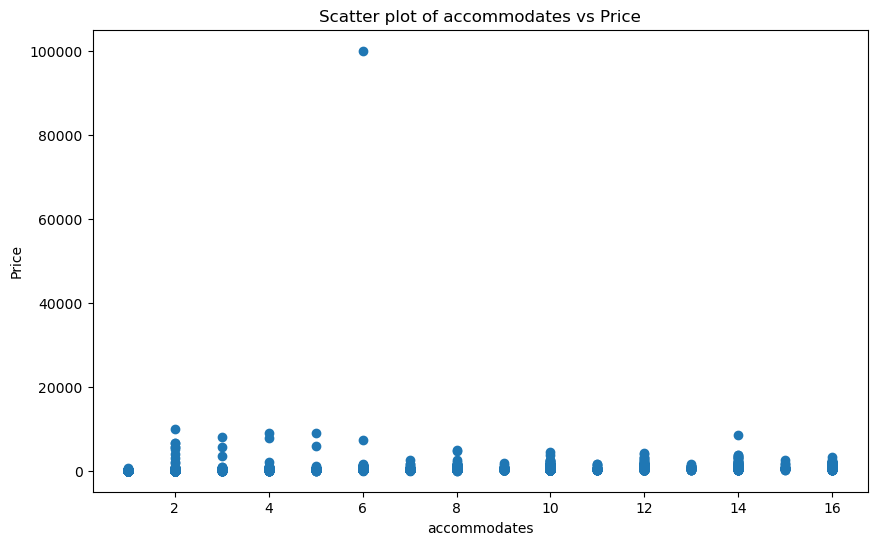

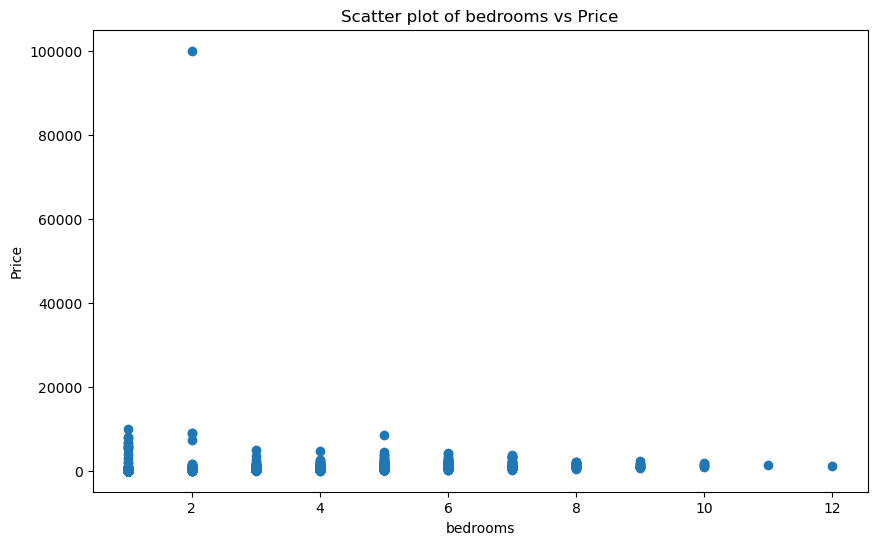

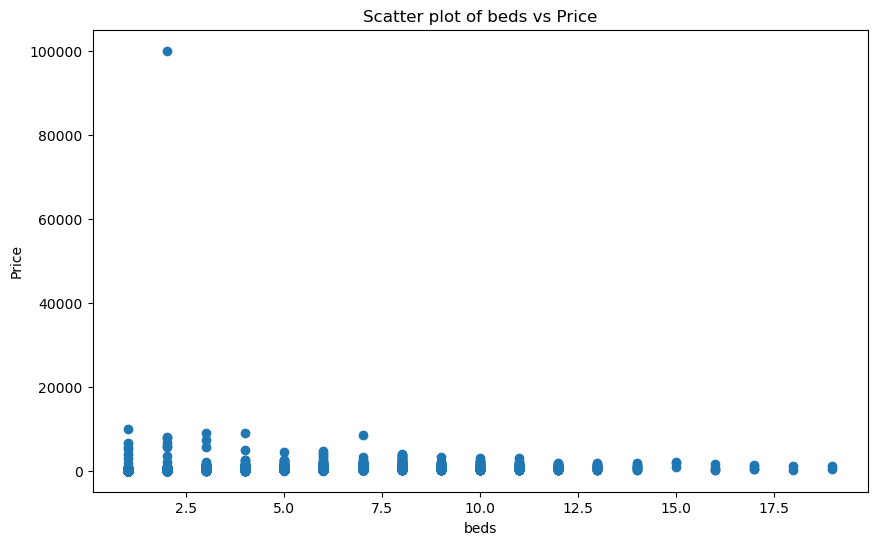

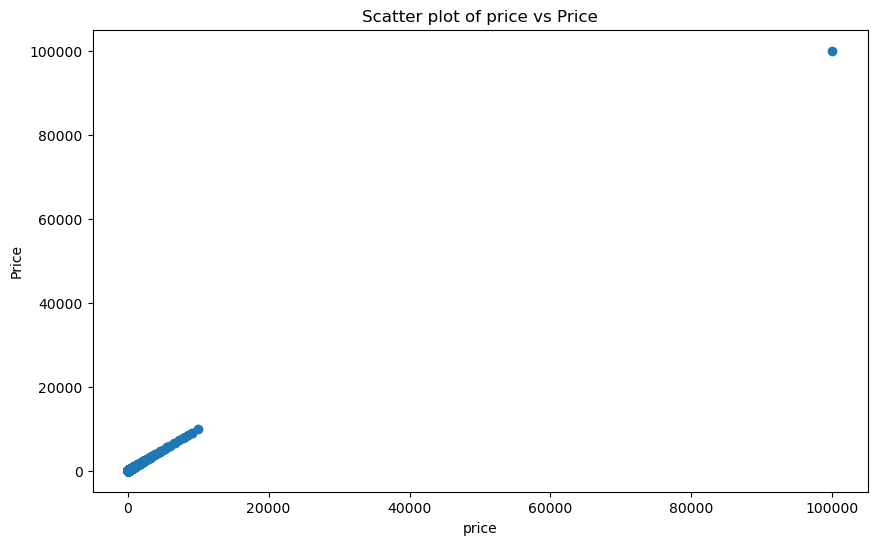

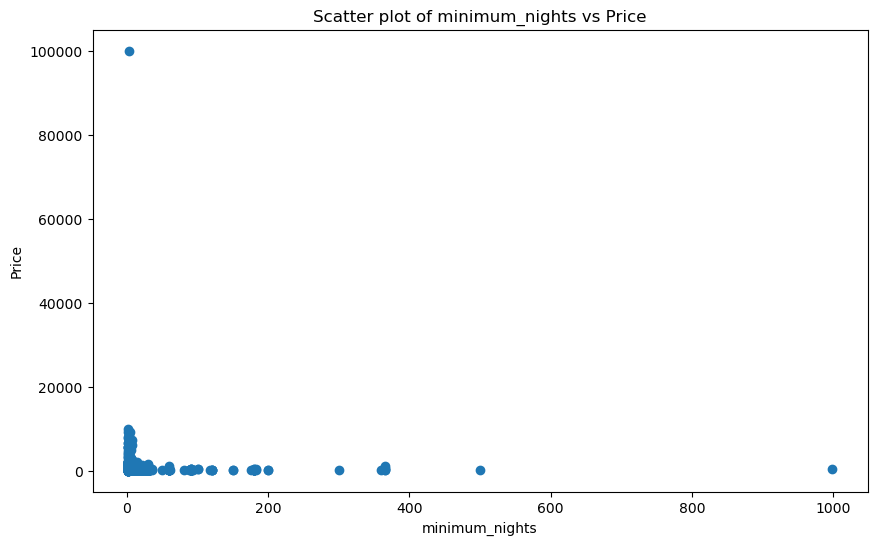

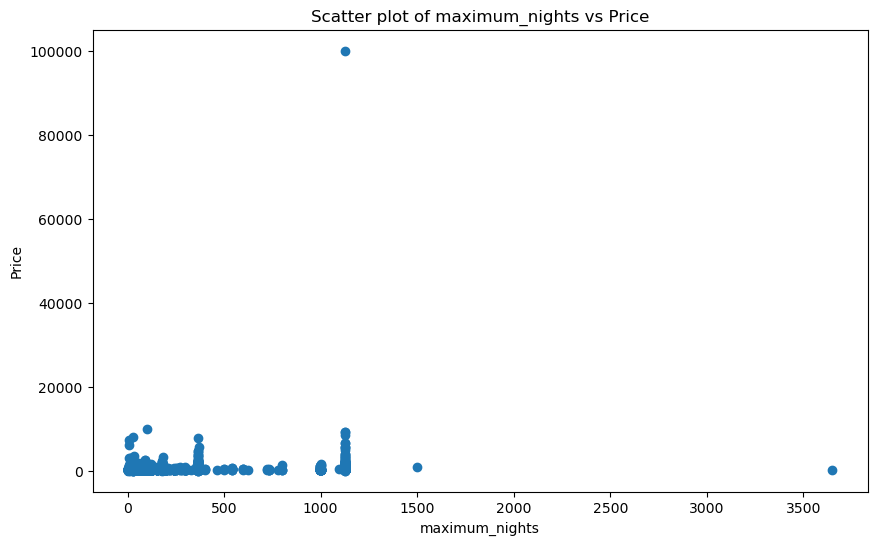

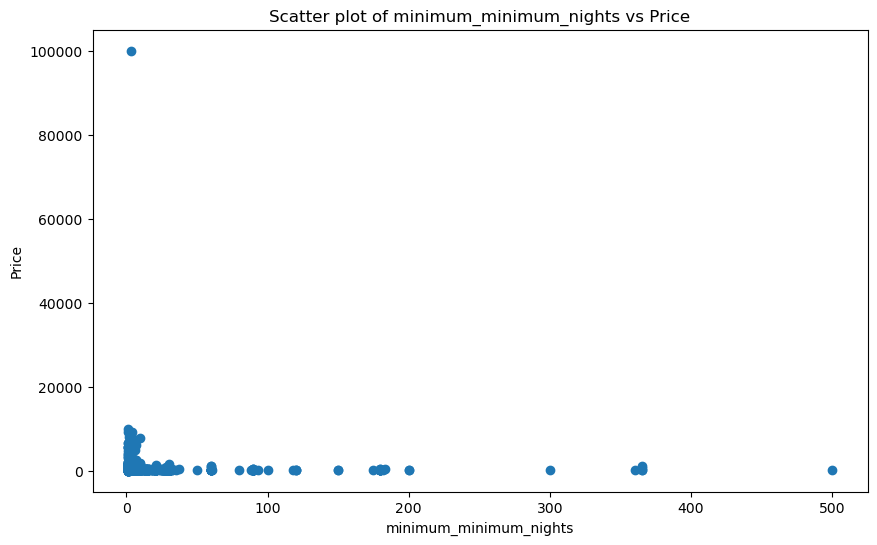

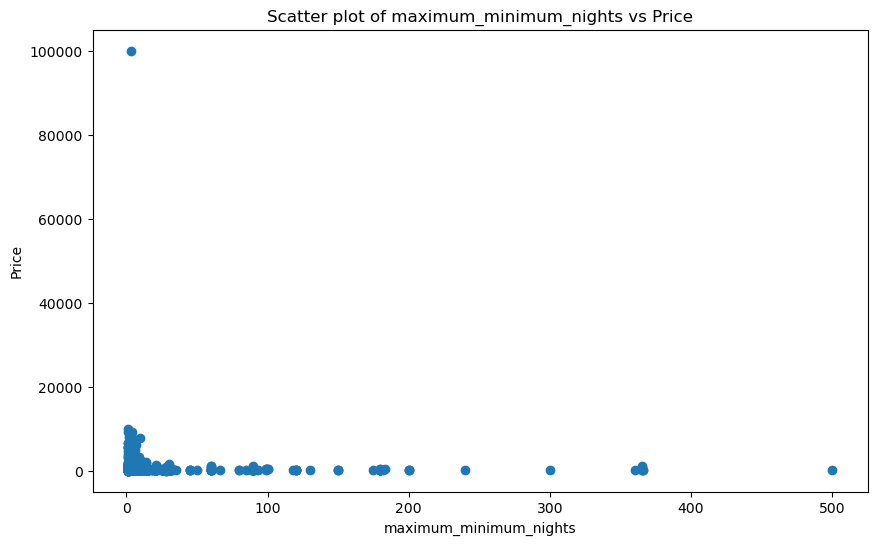

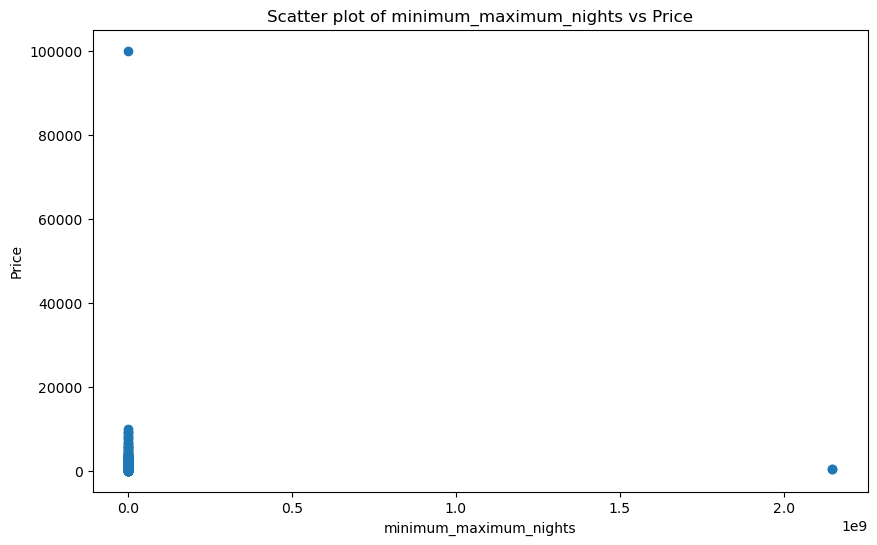

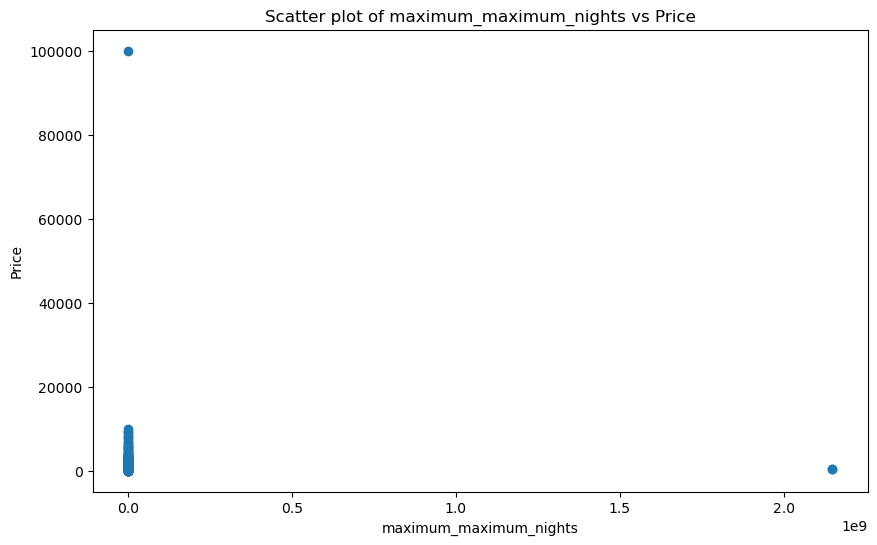

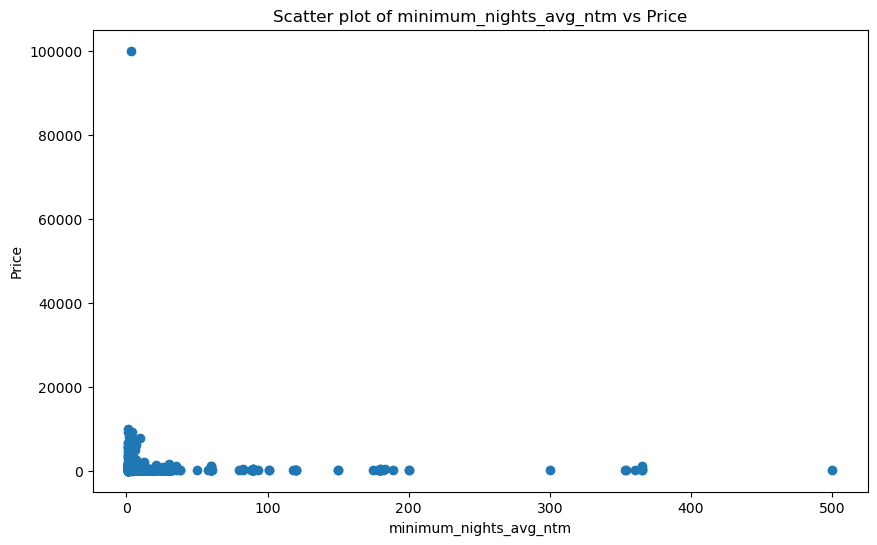

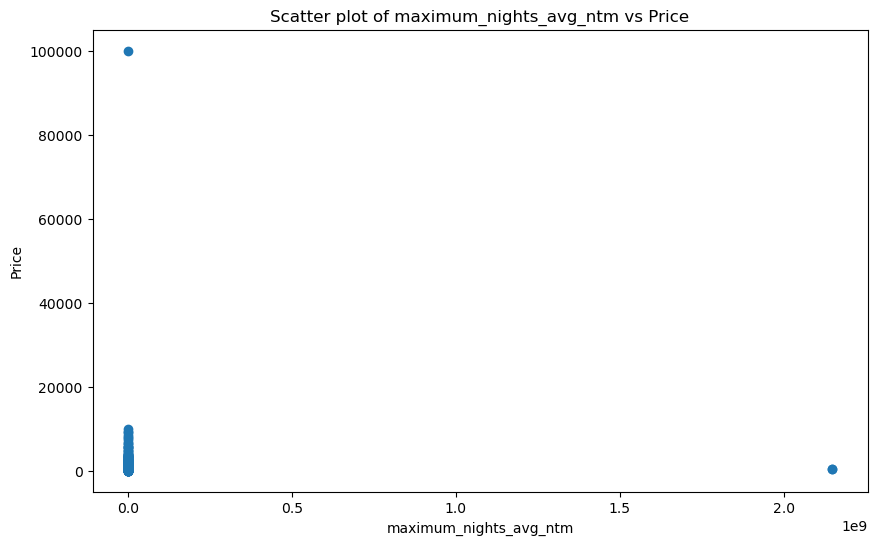

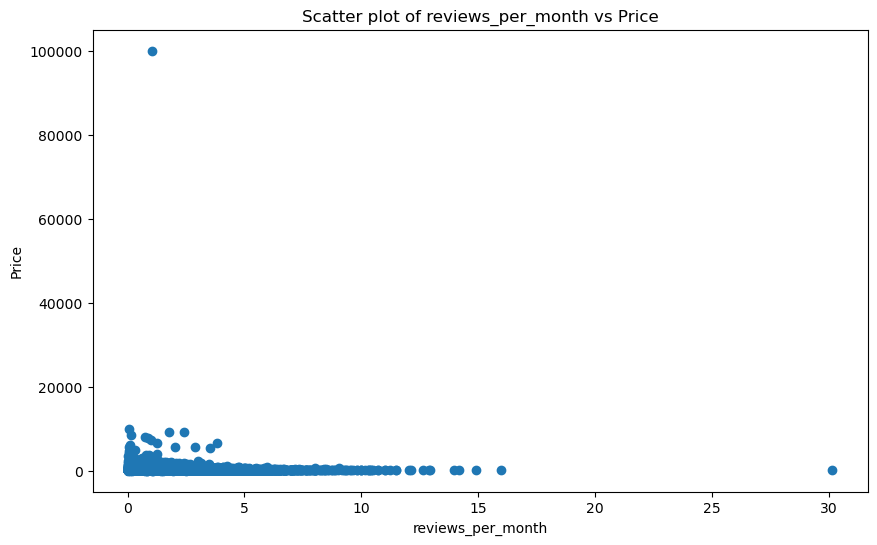

In [24]:
# Scatter plots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(x=listings_cleaned_columns_filled[col], y=listings_cleaned_columns_filled['price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Scatter plot of {col} vs Price')
    plt.show()




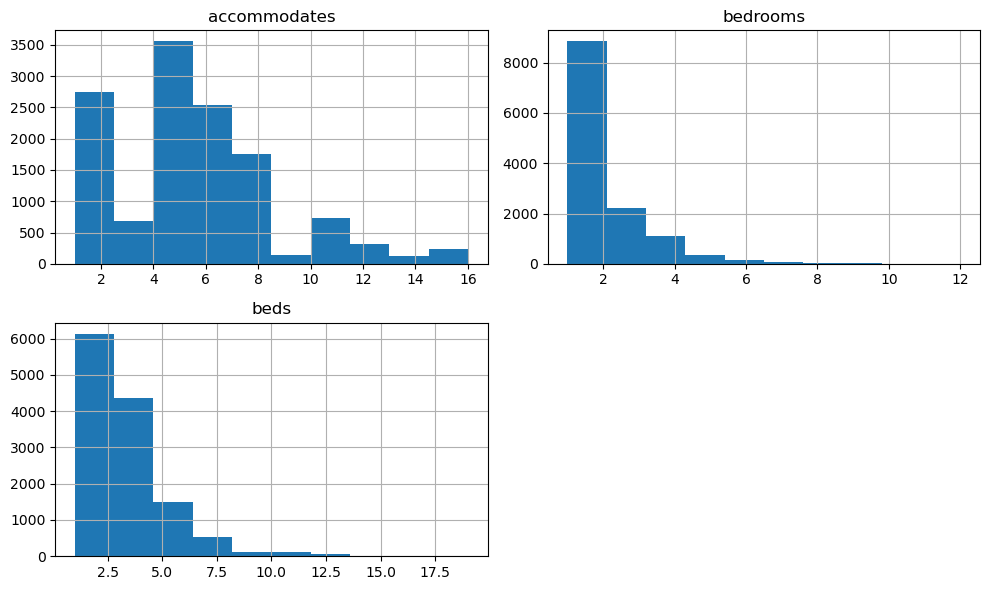

In [17]:
# Histogram of numeric columns
numeric_columns = ['accommodates', 'bedrooms', 'beds']
listings_cleaned_columns_filled[numeric_columns].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

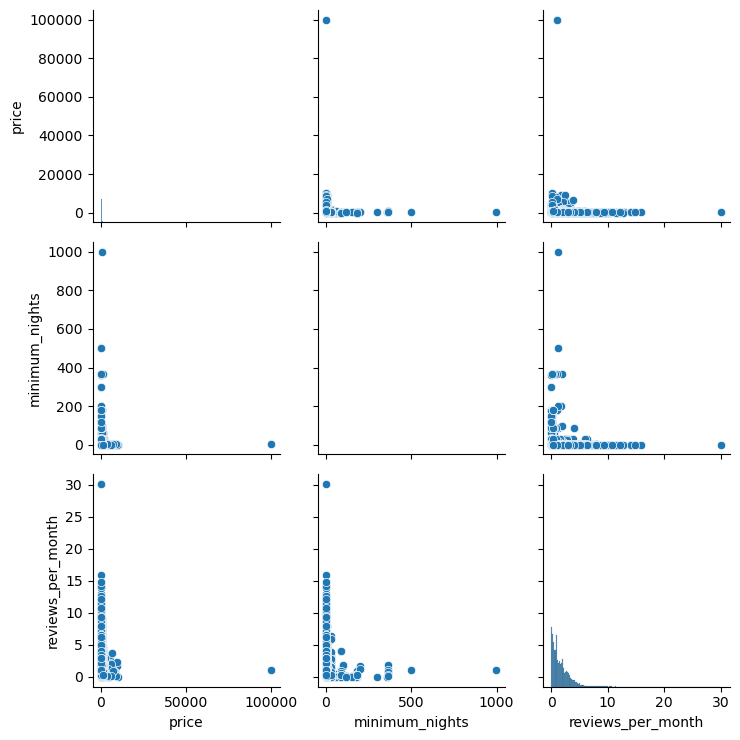

In [57]:
# Scatter plot matrix of numeric columns
numeric_columns = ['price', 'minimum_nights', 'reviews_per_month']
sns.pairplot(data=listings_cleaned_columns_filled[numeric_columns])
plt.tight_layout()
plt.show()


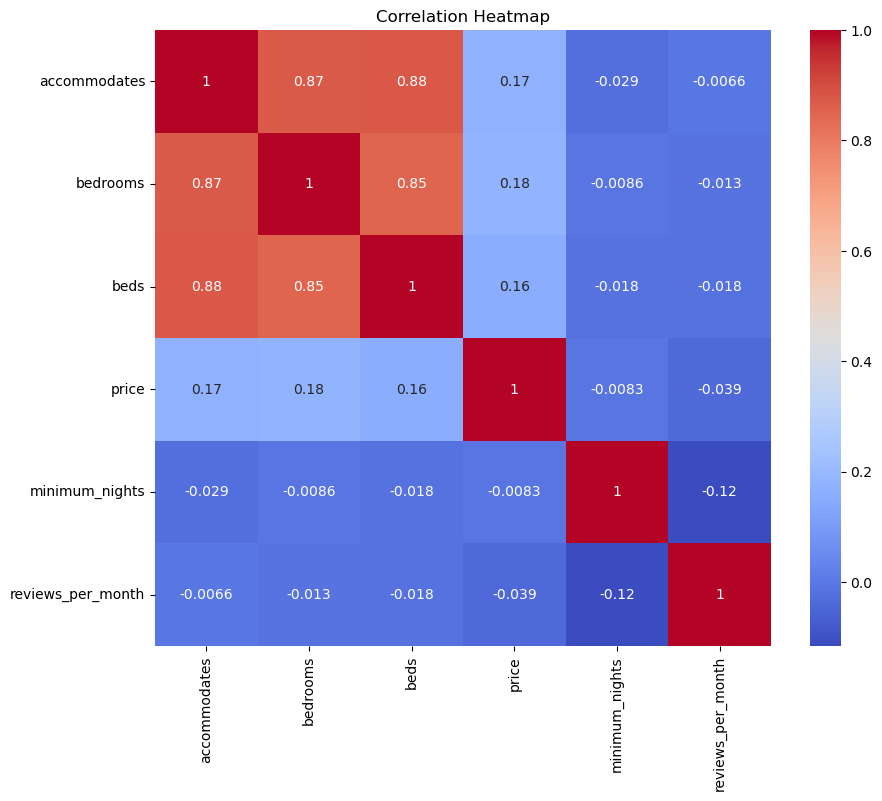

In [116]:
# Select the numeric columns for correlation analysis
numeric_columns = ['accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'reviews_per_month']

# Compute the correlation matrix
correlation_matrix = listings_cleaned_columns_filled[numeric_columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [118]:
!pip install folium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 560.1 kB/s eta 0:00:00a 0:00:01


In [119]:
import folium

# Create a map object centered on the mean latitude and longitude
map_center = [listings_cleaned_columns_filled['latitude'].mean(), listings_cleaned_columns_filled['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each listing
for index, row in listings_cleaned_columns_filled.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# Display the map
m


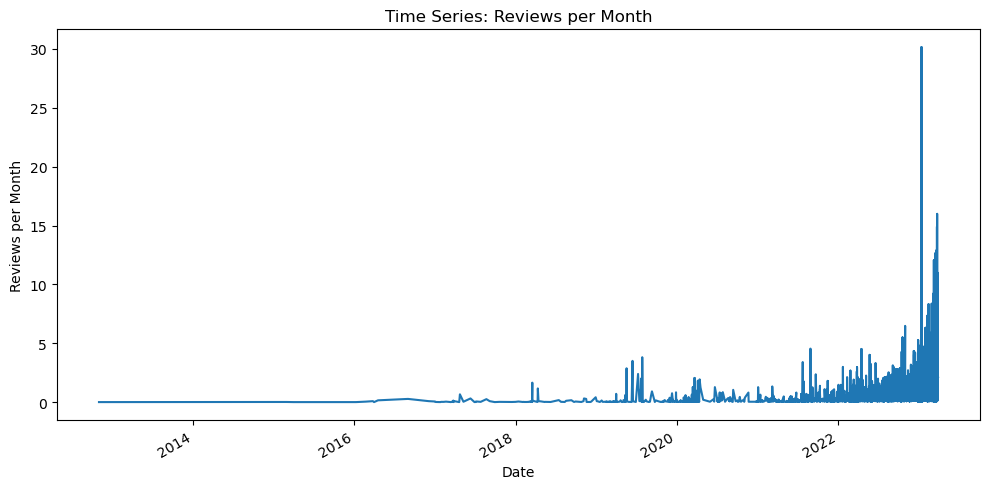

In [115]:
# Time series analysis
time_series_column = 'reviews_per_month'
listings_cleaned_columns_filled['date'] = pd.to_datetime(listings_cleaned_columns_filled['last_review'])
listings_cleaned_columns_filled.set_index('date', inplace=True)

# Select the relevant data for the time series analysis
time_series_data = listings_cleaned_columns_filled[time_series_column]

# Plot the time series
plt.figure(figsize=(10, 5))
time_series_data.plot()
plt.xlabel('Date')
plt.ylabel('Reviews per Month')
plt.title('Time Series: Reviews per Month')
plt.tight_layout()
plt.show()


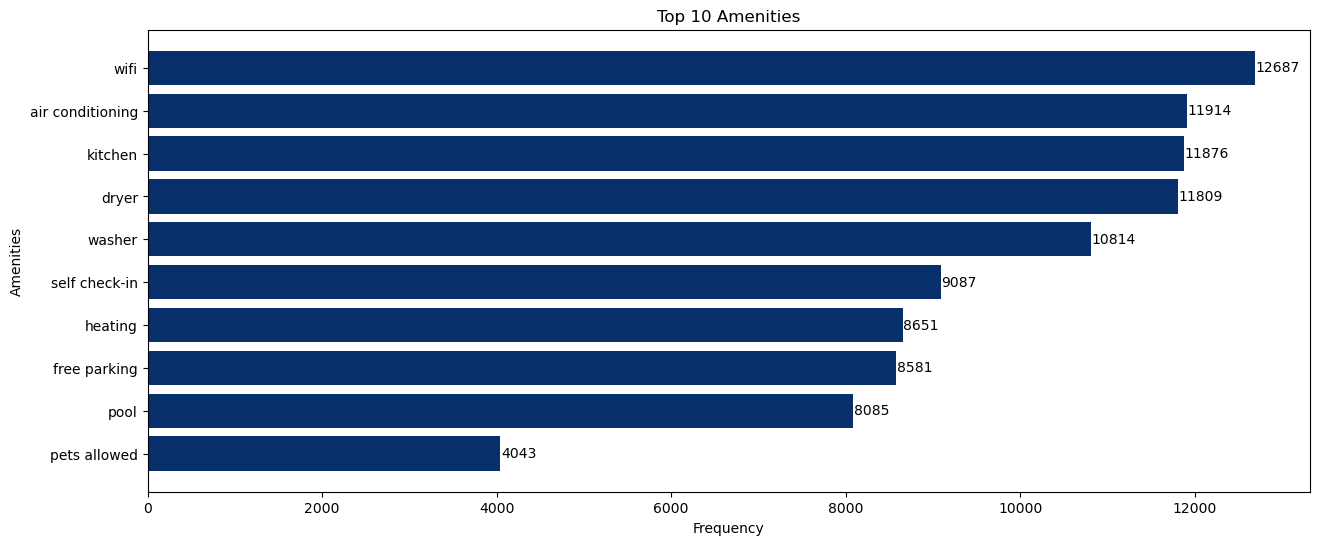

In [84]:
# Define the list of amenities to analyze
amenities_to_analyze = ['pool', 'wifi', 'kitchen', 'free parking', 'jacuzzi',
                       'washer', 'dryer', 'air conditioning', 'heating',
                       'self check-in', 'laptop-friendly workspace', 'pets allowed']

# Calculate the frequency of each amenity
amenity_frequency = Counter()

# Iterate over the DataFrame and count the occurrences of each amenity
for index, row in listings_cleaned_columns_filled.iterrows():
    amenities = row['amenities'].lower()
    for amenity in amenities_to_analyze:
        if amenity in amenities:
            amenity_frequency[amenity] += 1

# Get the top number of amenities
number = 10
top_amenities = amenity_frequency.most_common(number)

# Extract the amenities and their frequencies
amenities, frequencies = zip(*top_amenities)

# Define a sequential color palette
color_palette = cm.get_cmap('Blues')

# Plot the bar chart
plt.figure(figsize=(15, 6))
bars = plt.barh(amenities, frequencies, color=color_palette(frequencies))
plt.xlabel('Frequency')
plt.ylabel('Amenities')
plt.title('Top {} Amenities'.format(number))
plt.gca().invert_yaxis()

# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center')

plt.show()


**Top Amentities based on Airbnb https://www.airbnb.com/resources/hosting-homes/a/the-best-amenities-to-offer-right-now-203**